In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [3]:
data=pd.DataFrame({'x':[2,4,10, 12, 3, 20, 30, 11, 25, 7]})

In [4]:
kmeans = KMeans(n_clusters=2, max_iter=100, n_init=10)

In [5]:
kmeans.fit(data)

KMeans(max_iter=100, n_clusters=2, n_init=10)

In [10]:
print("\sum of squared errors",kmeans.inertia_)

\sum of squared errors 150.0


In [12]:
data['labels'] = kmeans.labels_

In [14]:
k_values = []
wcss_values = []


for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100, n_init=10)
    kmeans.fit(data[['x']])  # Only using the 'x' column for clustering
    k_values.append(k)
    wcss_values.append(kmeans.inertia_)

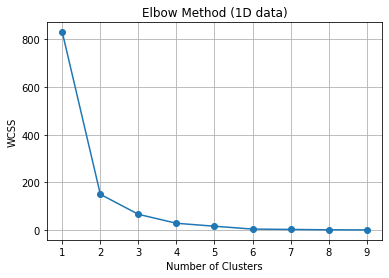

In [15]:
plt.figure()
plt.plot(k_values, wcss_values, marker='o')
plt.title("Elbow Method (1D data)")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid()
plt.show()


In [16]:
data

,x,labels
0,2,1
1,4,1
2,10,1
3,12,1
4,3,1
5,20,0
6,30,0
7,11,1
8,25,0
9,7,1



[2D] Sum of Square Error/ WCSS is : 14.666666666666666
k-value - 1 | WCSS : 1087.5555555555557
k-value - 2 | WCSS : 368.83333333333337
k-value - 3 | WCSS : 14.666666666666666
k-value - 4 | WCSS : 9.0
k-value - 5 | WCSS : 6.0
k-value - 6 | WCSS : 3.0
k-value - 7 | WCSS : 2.0
k-value - 8 | WCSS : 1.0
k-value - 9 | WCSS : 0.0


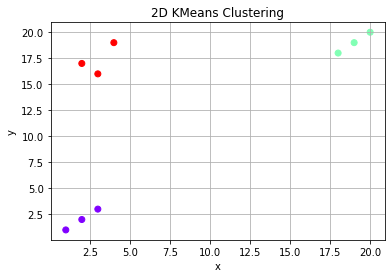

In [4]:
import numpy as np
x_axis = np.array([1, 2, 3, 18, 19, 20, 3, 2, 4])
y_axis = np.array([1, 2, 3, 18, 19, 20, 16, 17, 19])
data_2d = pd.DataFrame({'x': x_axis, 'y': y_axis})

# Fit KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, max_iter=100, n_init=10).fit(data_2d)
print('\n[2D] Sum of Square Error/ WCSS is :', kmeans.inertia_)

# Try different k-values
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100, n_init=10).fit(data_2d)
    print('k-value -', k, '| WCSS :', kmeans.inertia_)

# Visualize the 2D clusters
plt.figure()
plt.scatter(data_2d['x'], data_2d['y'], c=KMeans(n_clusters=3, n_init=10).fit_predict(data_2d), cmap='rainbow')
plt.title("2D KMeans Clustering")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


In [7]:
# Load the IRIS dataset
iris = pd.read_csv("IRIS.csv")
X = iris.iloc[:, 1:5]  # Using SepalLength, SepalWidth, PetalLength, PetalWidth

# Elbow method to choose k
k_values = []
wcss_values = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100, n_init=10)
    kmeans.fit(X)
    print('k-value -', k, '| WCSS :', kmeans.inertia_)
    k_values.append(k)
    wcss_values.append(kmeans.inertia_)

plt.figure()
plt.plot(k_values, wcss_values, marker='o')
plt.title("Elbow Method (IRIS Dataset)")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid()
plt.show()

# Final clustering with k=3
kmeans = KMeans(n_clusters=3, max_iter=100, n_init=10)
kmeans.fit(X)
iris['Clusters'] = kmeans.labels_

# Visualize one 2D projection of clusters
plt.figure(figsize=(5, 3))
plt.title("Iris Clusters (sepal)")
plt.scatter(iris.iloc[:, 1], iris.iloc[:, 2], c=iris['Clusters'], cmap='rainbow')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.grid()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'IRIS.csv'